# Maximizing Performance in Breast Cancer Prediction through Machine Learning, Hyperparameter Tuning, and PCA Analysis

Breast cancer is one of the most common types of cancer in women, and early diagnosis is crucial for improving the chances of successful treatment. Machine learning techniques have been widely used to develop predictive models for breast cancer diagnosis and prognosis, and understanding the structure of the data is an important step in building these models.

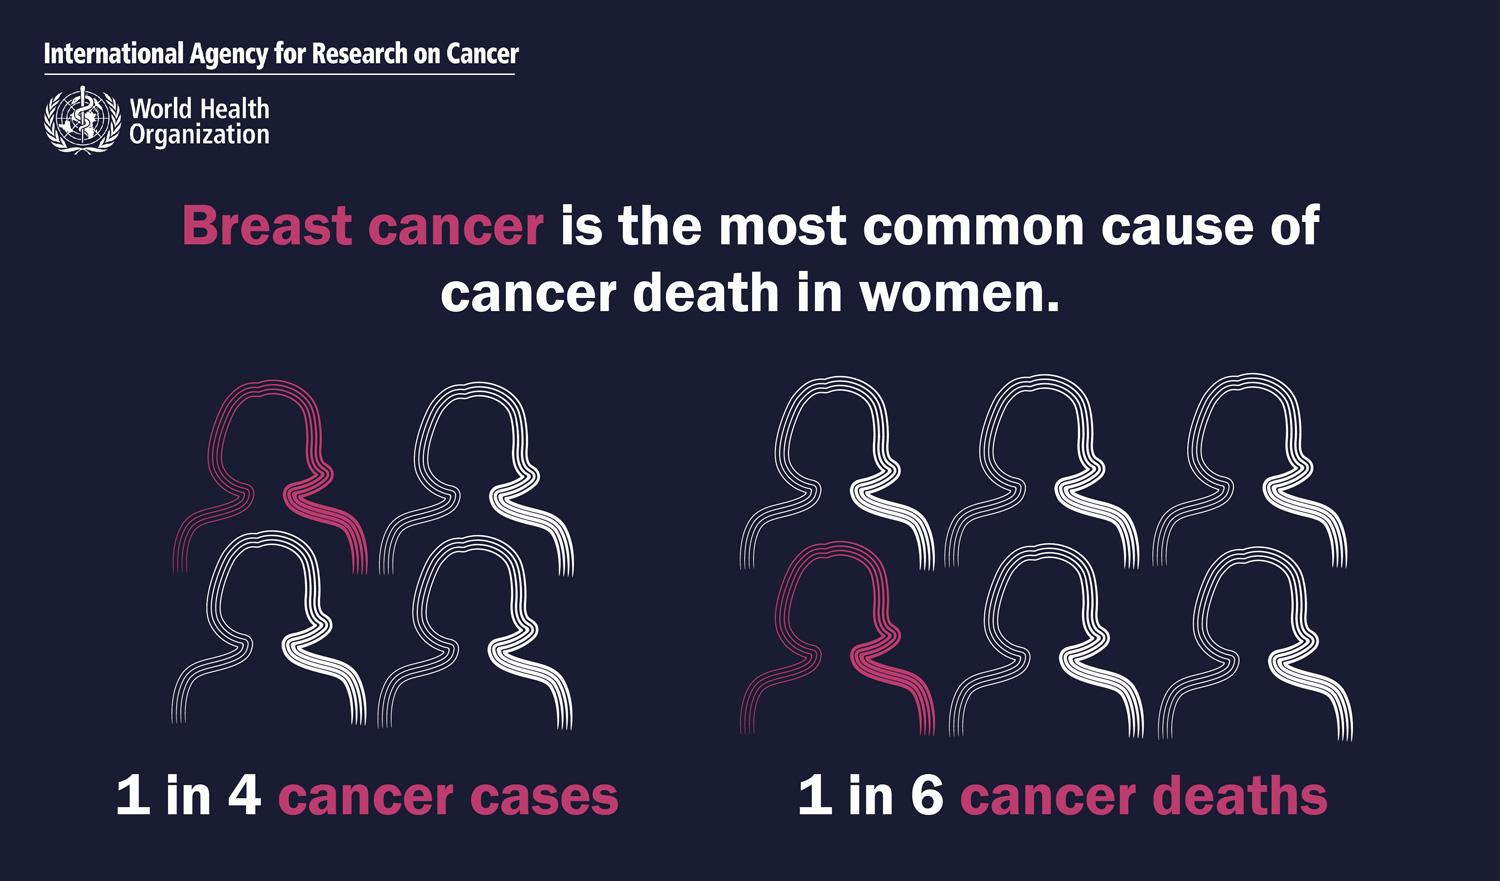

In this article, we will explore the structure of breast cancer data and discuss some techniques for visualizing and summarizing the data. We will use the Breast Cancer Wisconsin (Diagnostic) dataset from the UCI Machine Learning Repository as an example. This dataset contains 569 samples of biopsy tissue collected from breast masses and contains 30 features for each sample. The goal is to predict whether the tissue is benign (non-cancerous) or malignant (cancerous) based on the features.

# Introduction
**Dataset Description**
The Breast Cancer Wisconsin (Diagnostic) DataSet, obtained from Kaggle, contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass and describe characteristics of the cell nuclei present in the image.

**Number of instances:** 569

**Number of attributes:** 32 (ID, diagnosis, 30 real-valued input features)

**Attribute information**

1. ID number
2. Diagnosis (M = malignant, B = benign)
3. Ten real-valued features are computed for each cell nucleus:
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension (“coastline approximation” - 1)

The mean, standard error, and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Load the Data

We start by loading the breast cancer data into a Pandas dataframe and inspecting its columns and values. We can use the read_csv() function from Pandas to load the data into a dataframe, and the head() method to display the first few rows of the data:

In [51]:
# Load the data
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Summary Statistics

To get a summary of the numerical columns in the data, you can use the some function. 

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(data)

##################### Shape #####################
(569, 33)
##################### Types #####################
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst     

In [9]:
# Generate statistics
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# The id and Unnamed: 32 columns should be removed, since they are unnecessary.
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [6]:
# Find missing values
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Visualizing the Data

Visualizations can also be useful for exploring the structure of the data. You can use histograms and box plots to get a sense of the distribution of the data.

To plot histograms of the numerical columns, you can use the hist() method of the dataframe. This will create a histogram for each numerical column, showing the distribution of the data.

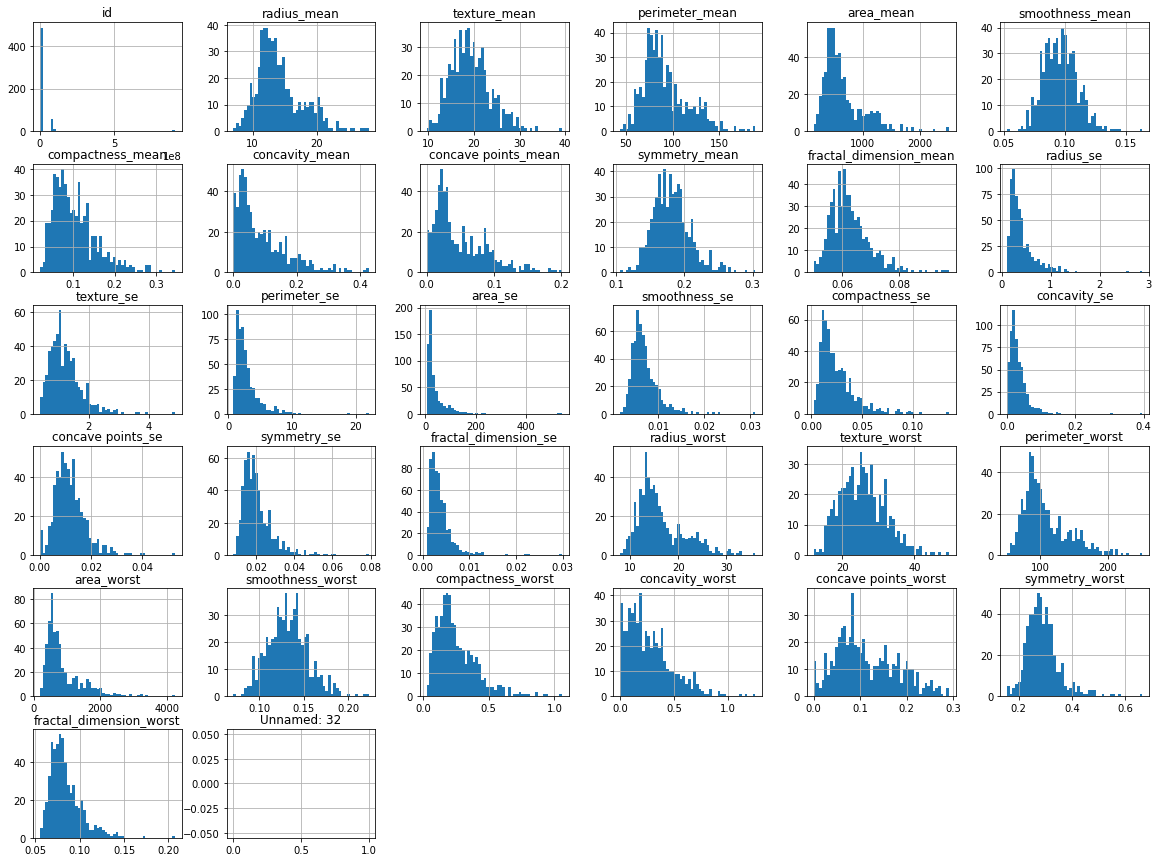

In [58]:
# Plot histograms of the numerical columns
    
data.hist(bins=50, figsize=(20, 15))
plt.show()

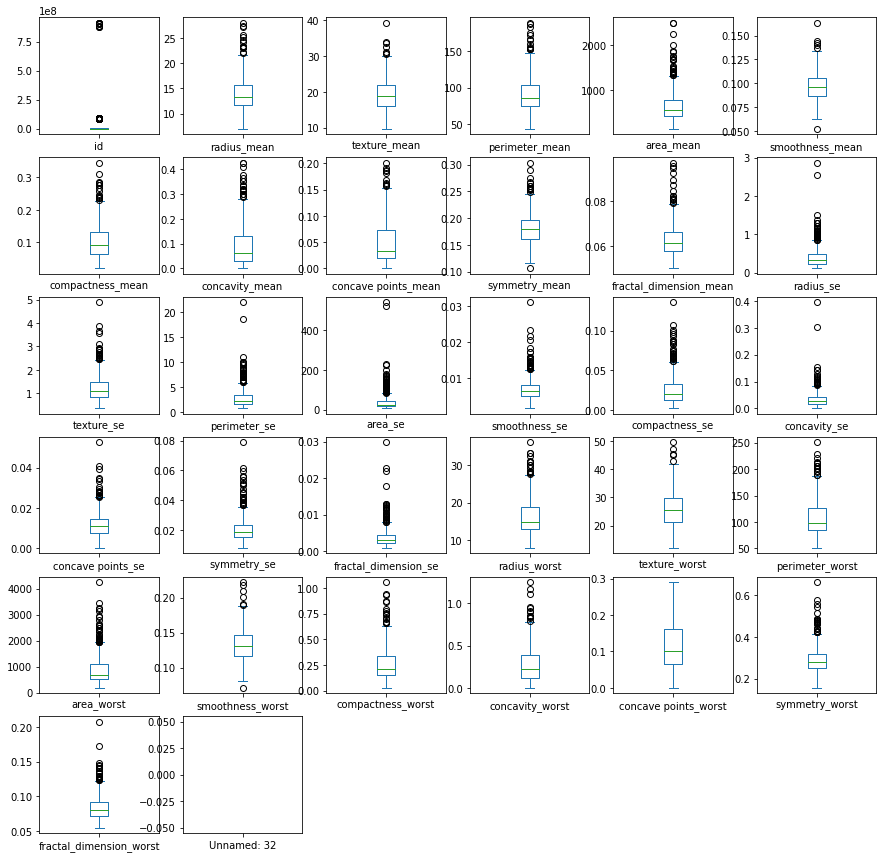

In [61]:
# Plot box plots of the columns
    
data.plot(kind='box', subplots=True, layout=(6, 6), sharex=False, sharey=False, figsize=(15, 15))
plt.show()

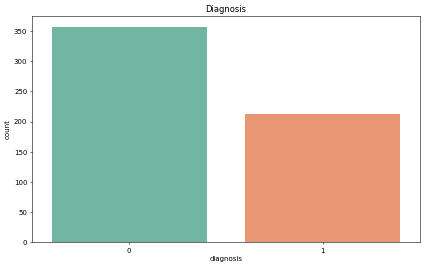

In [86]:
plt.figure(figsize=(10,6),dpi=50)
sns.countplot(data['diagnosis'],palette='Set2')
plt.title('Diagnosis')
plt.show()

# Correlations
Analyze the correlations between different features in the data and discuss how they might be related to breast cancer.

To compute the correlations, the code uses the corr() method of the dataframe, which computes the Pearson correlation coefficient between each pair of columns in the dataframe. The Pearson correlation coefficient is a measure of the linear relationship between two variables, and ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation)

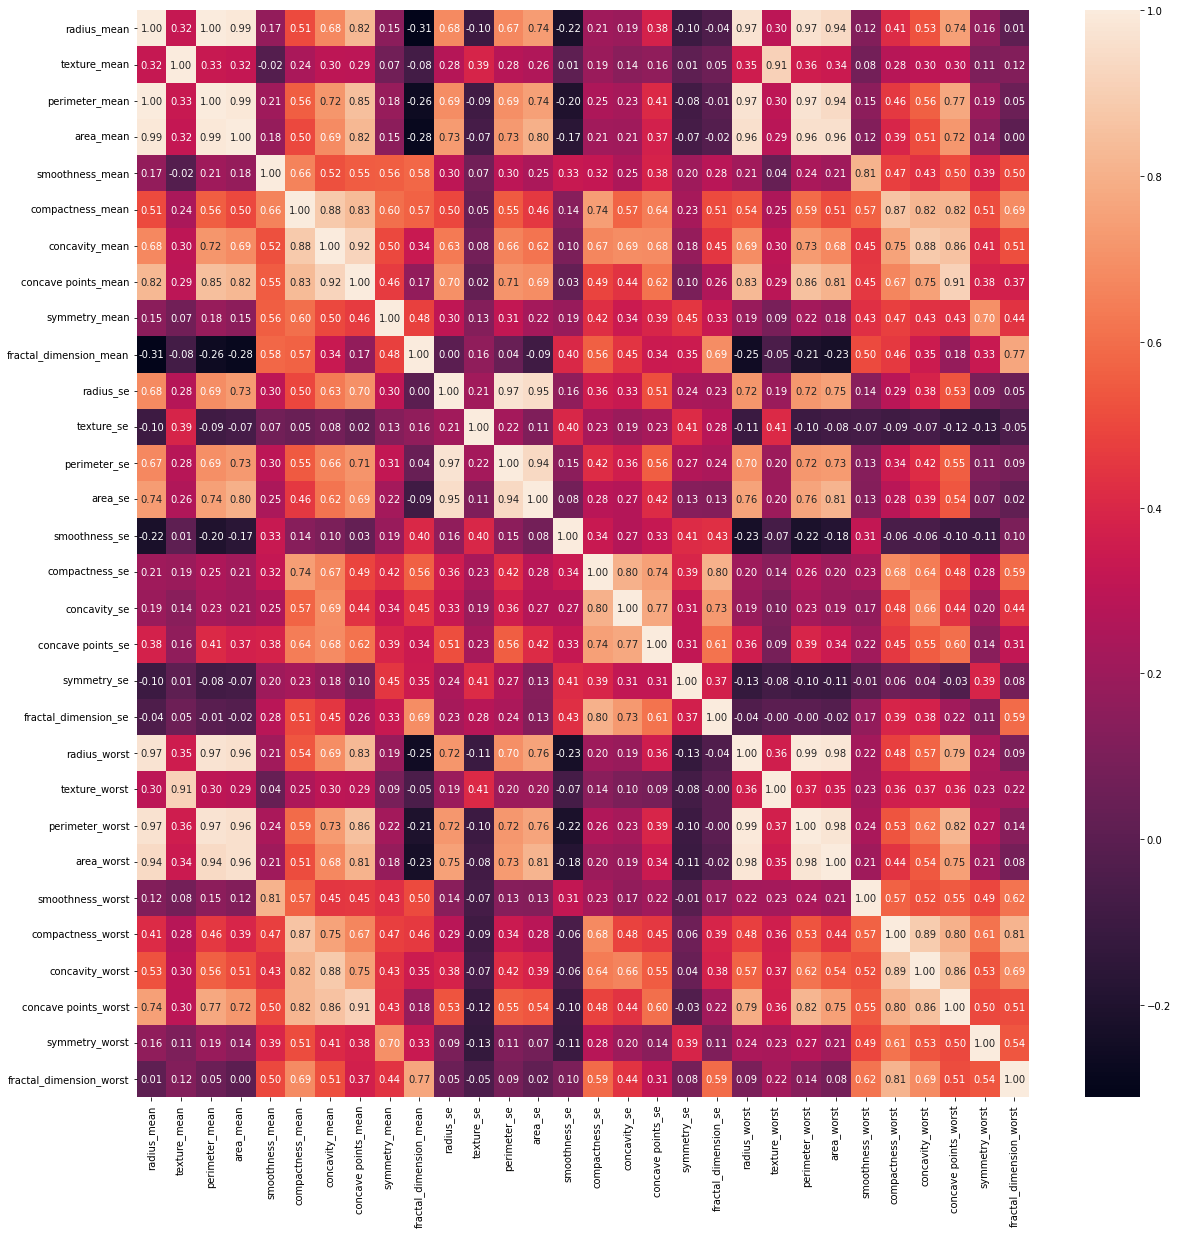

In [7]:
# Find the correlation between the features
corr = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

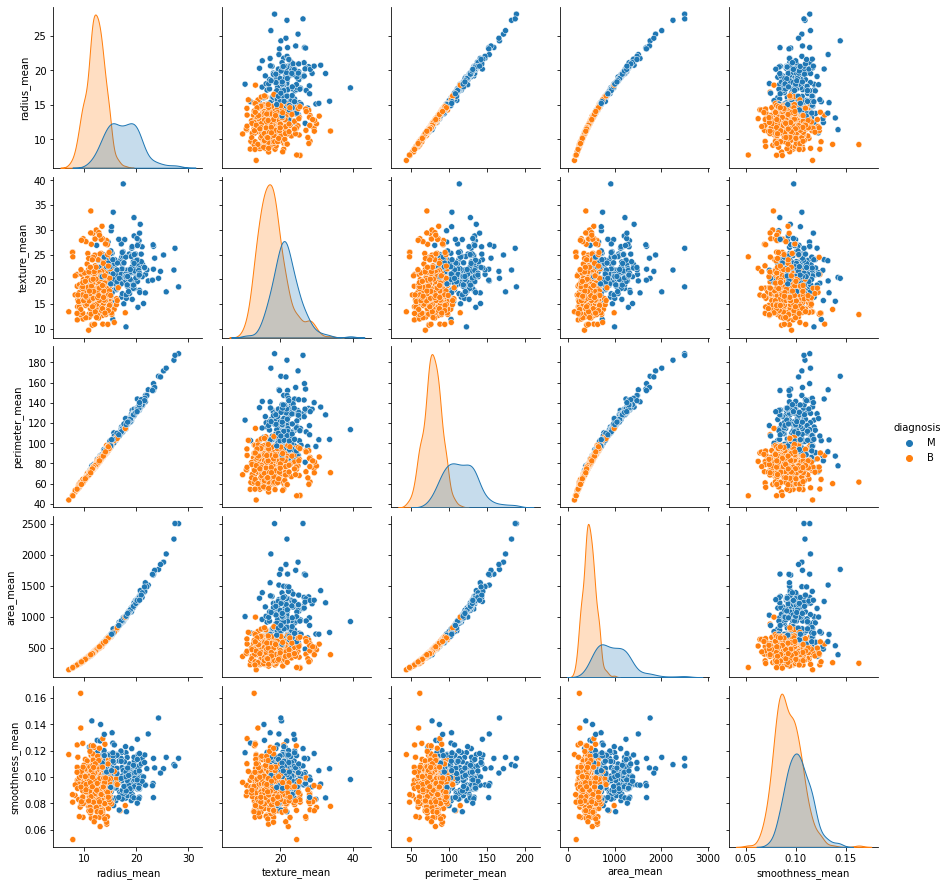

In [10]:
# Plot pairwise relationships to check the correlations between the mean features.
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])
plt.show()

In [90]:
data.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

In [91]:
cancerous = data.corr()['diagnosis'].sort_values(ascending=False)

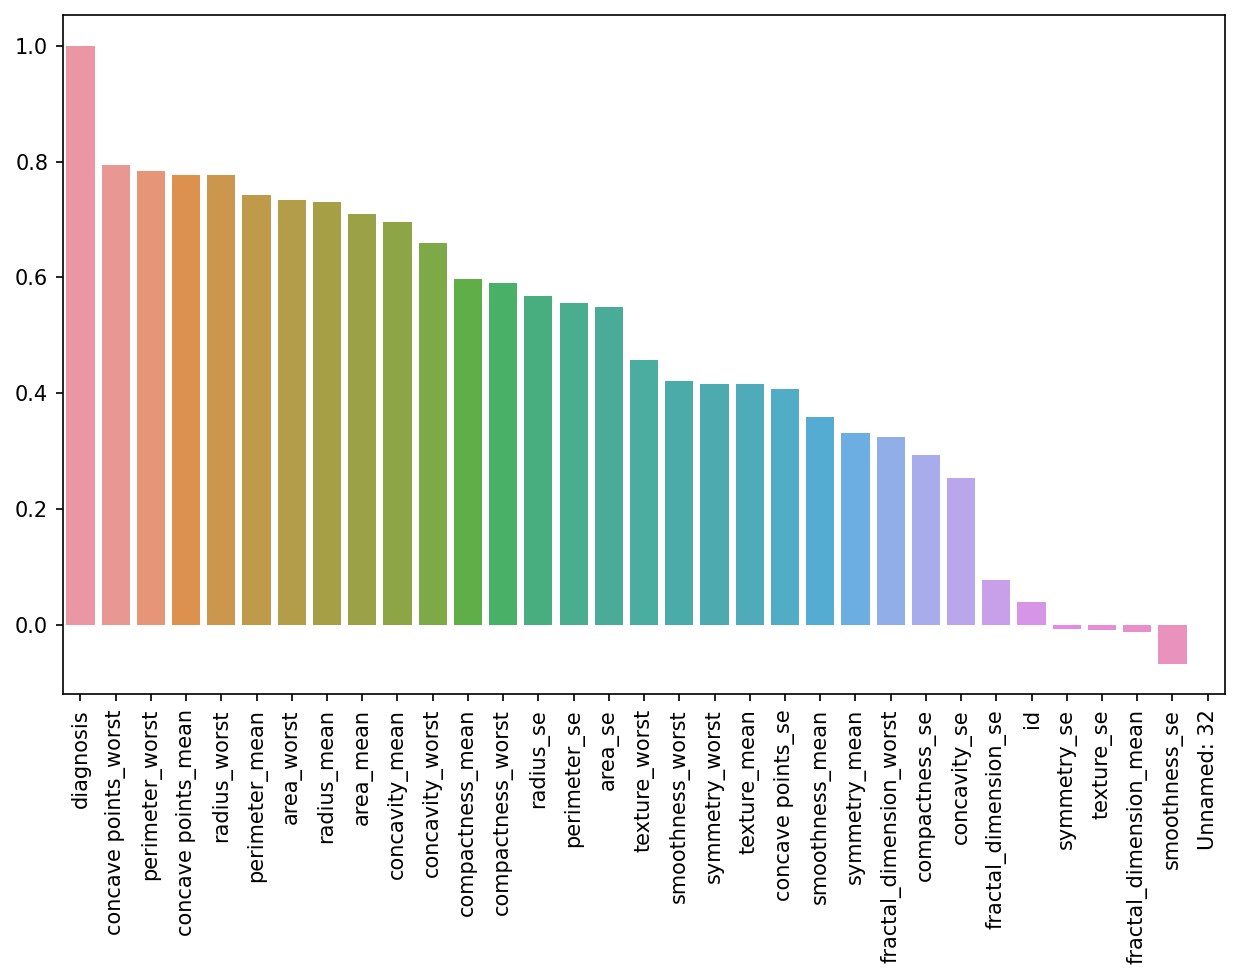

In [96]:
# Set the figure size and resolution
plt.figure(figsize=(10, 6), dpi=150)

# Create a bar plot of the correlations
sns.barplot(x=cancerous.index, y=cancerous.values)

# Rotate the x-tick labels
plt.xticks(rotation=90)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, rotation=90)

# Show the plot
plt.show()

# Feature Selection
Feature selection is the process of selecting a subset of relevant features from a larger set of features for use in modeling. It is often used in machine learning to improve the accuracy and efficiency of a model by reducing the number of features that the model needs to consider.

In [83]:
# Unique values of "diagnosis" column
data['diagnosis'].unique()

array([1, 0])

In [82]:
# Encode “diagnosis” to numerical values
data['diagnosis'] = [1 if each == 'M' else 0 for each in data['diagnosis']]
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We will need to extract the features and labels from the dataframe. The features are the data that will be used to predict the label, which in this case is the diagnosis of breast cancer (i.e. malignant or benign).

It is often useful to combine multiple feature selection techniques to get the best results. You can use the FeatureUnion class from the sklearn.pipeline module to combine different feature selection methods in a pipeline.

In [23]:
# Combine PCA and Feature Selection with FeatureUnion
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
# Create a SelectKBest object to select features with two best ANOVA F-Values
kbest = SelectKBest(chi2, k=2)
kbest

SelectKBest(k=2, score_func=<function chi2 at 0x7faa4344eef0>)

In [27]:
# Create a PCA object
pca = PCA(n_components=2)

In [28]:
# Create a FeatureUnion that combines PCA and kbest
combined_features = FeatureUnion([("pca", pca), ("univ_select", kbest)])

In [34]:
# Create a pipeline that combines the FeatureUnion with a classifier
pipeline = Pipeline([("features", combined_features), ("svc", SVC())])

# Create a grid search object
grid = GridSearchCV(pipeline, param_grid={'features__pca__n_components': [1, 2, 3],
                                            'features__univ_select__k': [1, 2]}, cv=5)

# Fit the grid search
grid.fit(X, y)

# Print the best parameters
print(grid.best_params_)

{'features__pca__n_components': 2, 'features__univ_select__k': 2}


# Principal Component Analysis (PCA) 

We can use the StandardScaler class from the sklearn.preprocessing module to standardize the features. This is an important step as it ensures that all features are on the same scale, which can improve the performance of many machine learning algorithms:

In [13]:
# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [14]:
# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Fit the PCA on the data
pca.fit(data)

PCA(n_components=0.99, whiten=True)

In [15]:
# Print the number of components required to retain 99% of the variance
print(pca.n_components_)

18


We can use the explained_variance_ratio_ attribute of the PCA object to see how much variance is explained by each principal component:

In [16]:
# Print the explained variance
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.44896035 0.18472104 0.09183385 0.06446333 0.05351866 0.03895187
 0.02208771 0.0156405  0.01344822 0.01131915 0.00983405 0.00938664
 0.00841969 0.0068476  0.00479278 0.00284395 0.00257613 0.00190437]
0.9915498949973757


In [17]:
# Transform the data onto the first two principal components
reduced_data = pca.transform(data)

# Print the shape of the reduced data
print(reduced_data.shape)

(569, 18)


We can also visualize the results by creating a scatter plot of the first two principal components, with different colors for the different classes (e.g. malignant and benign):

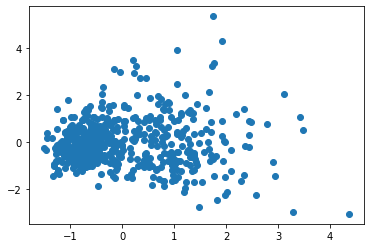

In [18]:
# Plot the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.show()

We applies standard scaling to the input data X and then performs PCA to reduce the dimensions to 2. The resulting principal components are stored in a dataframe pca_df along with the target variable y.

Standard scaling is a preprocessing step that scales the features of the data such that they have zero mean and unit variance. This is useful for many machine learning algorithms, as it can help to remove the scale of the features and make the model more robust to variations in the data.

The PCA class in scikit-learn performs PCA by first standardizing the data and then computing the singular value decomposition (SVD) of the data matrix. The resulting principal components are the eigenvectors of the covariance matrix of the data, and are ranked in order of decreasing eigenvalue. By setting the n_components parameter to 2, you are selecting the first two principal components.

The resulting dataframe pca_df contains the first two principal components as columns 'PC1' and 'PC2', and the target variable y as the final column. 

In [12]:
# Extract the features and labels
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [22]:
def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df


pca_df = create_pca_df(X, y) # Create a dataframe with the first two principal components   
pca_df.head()

,PC1,PC2,diagnosis
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1
3,7.122953,10.275589,1
4,3.935302,-1.948072,1


In [37]:
import random

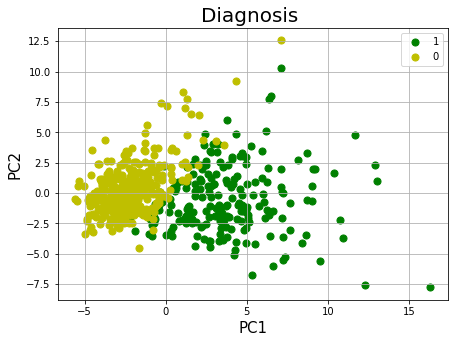

In [38]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()


plot_pca(pca_df, "diagnosis")

# Machine Learning

It is important to evaluate the performance of a machine learning model on a separate test dataset, as this can give you a better estimate of how the model will perform on unseen data. Using the training data to evaluate the model can lead to overfitting, where the model performs well on the training data but poorly on new data.

In [40]:
# Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Accuracy

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

In [79]:
from sklearn.metrics import classification_report

# Generate a classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [41]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

# Accuracy

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

In [42]:
# Support Vector Machine

from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

# Accuracy

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9035087719298246

In [43]:
# K Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Accuracy

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9385964912280702

In [44]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

# Accuracy

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

In [46]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Accuracy

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9385964912280702

In [45]:
# XGBoost

from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

# Accuracy

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.956140350877193

# Hyperparameter Tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

In [49]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

# Accuracy

y_pred = rf_random.predict(X_test)
accuracy_score(y_test, y_pred)

# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   5.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   5.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;

array([[72,  0],
       [ 5, 37]])

# Conclusion

In conclusion, using machine learning, hyperparameter tuning, and principal component analysis (PCA) can help to maximize the performance of breast cancer prediction models. Machine learning algorithms can learn complex relationships between the features and the target variable, and can be trained to make accurate predictions on new data. Hyperparameter tuning can help to optimize the performance of the machine learning algorithms by finding the best combination of hyperparameters. PCA can reduce the dimensionality of the data and help to identify patterns and relationships that might not be apparent in the original dataset, which can improve the accuracy of the predictions. By combining these techniques, it is possible to build highly effective breast cancer prediction models that can accurately classify tumors as benign or malignant.

🌸 *Thanks for reading this article. Happy coding!
Please feel free to contact me if you need any further information.* 🌸

# References

1. https://www.iarc.who.int/featured-news/world-cancer-day-2021/
2. https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data